In [162]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint, skew
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
%matplotlib inline

# Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [163]:
#Importing Dataset
df=pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [164]:
df.shape

(846, 19)

In [165]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

Observation: We can observe that all the attributes except 'class' has either int64/float64 datatype. 'class' attribute has object datatype. 

In [166]:
print('These are the attributes that the dataset has')
print('')
print('')
for i in df.columns:
    print(i)

These are the attributes that the dataset has


compactness
circularity
distance_circularity
radius_ratio
pr.axis_aspect_ratio
max.length_aspect_ratio
scatter_ratio
elongatedness
pr.axis_rectangularity
max.length_rectangularity
scaled_variance
scaled_variance.1
scaled_radius_of_gyration
scaled_radius_of_gyration.1
skewness_about
skewness_about.1
skewness_about.2
hollows_ratio
class


In [167]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Observation
##### circularity:5 missing values;
##### distance_circularity: 4 missing values
##### radius_ratio: 6 missing values
##### pr.axis_aspect_ration: 2 missing values
##### scatter_ration: 1 missing value
##### elongatedness: 1 missing value
##### pr.axis_rectangularity: 3 missing values
##### scaled_variance: 3 missing values
##### sclaed_variance.1: 2 missing values
##### scaled_radius_of_gyration: 2 missing values
##### scaled_radius_of_gyration.1: 4 missing values
##### skewness_about: 6 missing values
##### skewness_about.1: 1 missing value
##### skewness_about.2: 1 missing value
We will deal with missing values, but first let's understand the data.


In [168]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

#### Descriptive statistics for the numerical variables

compactness: Range of Q1 to Q3 is between 87 to 100. It appears that the column is almost normally distributed.

circularity: Range of Q1 to Q3 is 40 to 49. This column too appears to be almost normally distributed.

distance_circularity: Range of Q1 to Q3 is 70 to 98. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

radius_ratio: Range of Q1 to Q3 is 141 to 195. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

pr.axis_aspect_ratio: Range of Q1 to Q3 is 57 to 65. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

max.length_aspect_ratio: Range of Q1 to Q3 is 7 to 10. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

scatter_ratio: Range of Q1 to Q3 is 147 to 198. Mean is greater than median, we can say that the column is skewed towards right.

elongatedness: Range of Q1 to Q3 is 33 to 46. Mean is less than median, we can say that the column is skewed towards left.

pr.axis_rectangularity: Range of Q1 to Q3 is 19 to 23. Mean is greater than median, we can say that the column is skewed towards right.

max.length_rectangularity: Range of Q1 to Q3 is 137 to 159. Mean is greater than median, we can say that the column is skewed towards right.

scaled_variance: Range of Q1 to Q3 is 167 to 217. Mean is grater than median, we can say that the column is skewed towards right.

scaled_variance.1: Range of Q1 to Q3 is 318 to 587. Mean is greater than median, we can say that the column is skewed towards right.

scaled_radius_of_gyration: Range of Q1 to Q3 is 149 to 198. Mean is greater than median, we can say that the column is skewed towards right.

scaled_radius_of_gyration.1: Range of Q1 to Q3 is 67 to 75. Mean is greater than median, we can say that the column is skewed towards right.

skewness_about: Range of Q1 to Q3 is 2 to 6. Mean is greater than median, skewed towards right.

skewness_about.1: Range of Q1 to Q3 is 5 to 19. Mean is greater than median, skewed towards right.

skewness_about.2: Range of Q1 to Q3 is 184 to 193. Mean is slightly greater than median, almost normally distributed.

hollows_ratio: Range of Q1 to Q3 is 197 to 211. Mean is less than median, skewed towards left.

In [169]:
df['class'] = df['class'].replace({'car': 1, 'van': 2, 'bus': 3})

### Let's understand how the attributes are distributed

Skewness of compactness attribute:0.3805942876591023


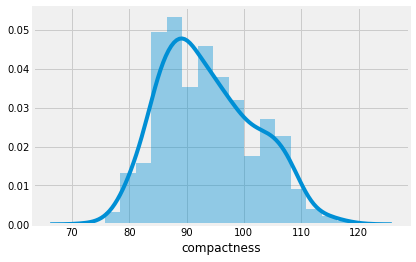

In [170]:
sns.distplot(df['compactness'])
print('Skewness of compactness attribute:{}'.format(skew(df['compactness'])))

Skewness of compactness attribute:0.3805942876591023


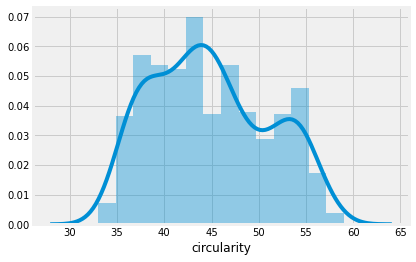

In [171]:
sns.distplot(df['circularity'])
print('Skewness of compactness attribute:{}'.format(skew(df['compactness'])))

Skewness of distance_circularity attribute:nan


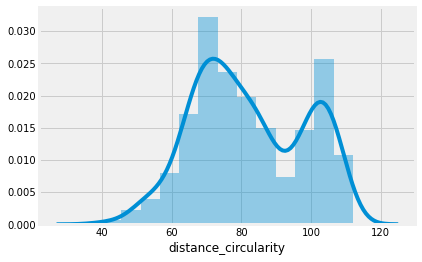

In [172]:
sns.distplot(df['distance_circularity'])
print('Skewness of distance_circularity attribute:{}'.format(skew(df['distance_circularity'])))

Skewness of radius_ratio attribute:nan


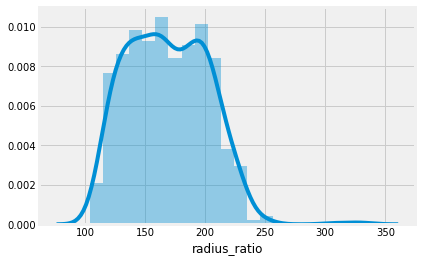

In [173]:
sns.distplot(df['radius_ratio'])
print('Skewness of radius_ratio attribute:{}'.format(skew(df['radius_ratio'])))

Skewness of pr.axis_aspect_ratio attribute:nan


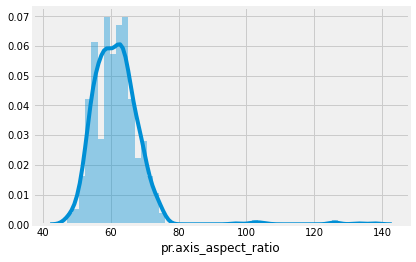

In [174]:
sns.distplot(df['pr.axis_aspect_ratio'])
print('Skewness of pr.axis_aspect_ratio attribute:{}'.format(skew(df['pr.axis_aspect_ratio'])))

Skewness of max.length_aspect_ratio attribute:6.766369266562171


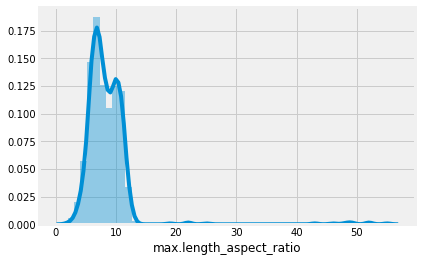

In [175]:
sns.distplot(df['max.length_aspect_ratio'])
print('Skewness of max.length_aspect_ratio attribute:{}'.format(skew(df['max.length_aspect_ratio'])))

Skewness of scatter_ratio attribute:nan


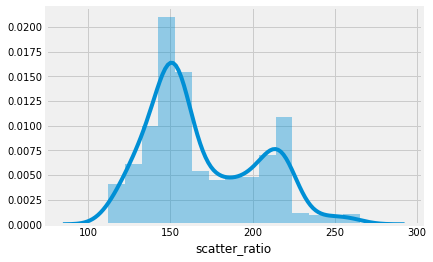

In [176]:
sns.distplot(df['scatter_ratio'])
print('Skewness of scatter_ratio attribute:{}'.format(skew(df['scatter_ratio'])))

Skewness of elongatedness attribute:nan


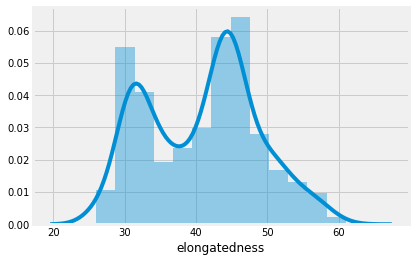

In [177]:
sns.distplot(df['elongatedness'])
print('Skewness of elongatedness attribute:{}'.format(skew(df['elongatedness'])))

Skewness of pr.axis_rectangularity attribute:nan


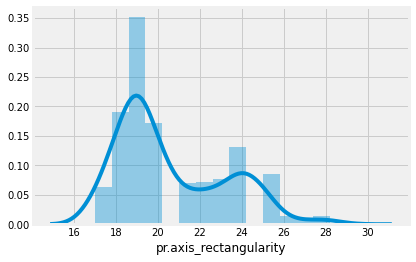

In [178]:
sns.distplot(df['pr.axis_rectangularity'])
print('Skewness of pr.axis_rectangularity attribute:{}'.format(skew(df['pr.axis_rectangularity'])))

Skewness of max.length_rectangularity attribute:0.25590440255890234


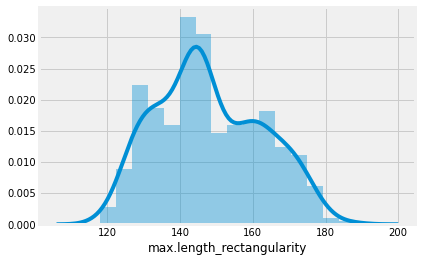

In [179]:
sns.distplot(df['max.length_rectangularity'])
print('Skewness of max.length_rectangularity attribute:{}'.format(skew(df['max.length_rectangularity'])))

Skewness of scaled_variance attribute:nan


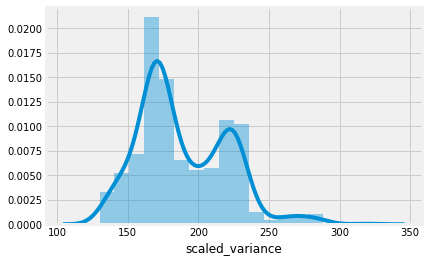

In [180]:
sns.distplot(df['scaled_variance'])
print('Skewness of scaled_variance attribute:{}'.format(skew(df['scaled_variance'])))

In [181]:
sns.distplot(df['scaled_variance.1'])
print('Skewness of scaled_variance.1 attribute:{}'.format(skew(df['scaled_variance.1'])))

Skewness of scaled_variance.1 attribute:nan


Skewness of scaled_radius_of_gyration attribute:nan


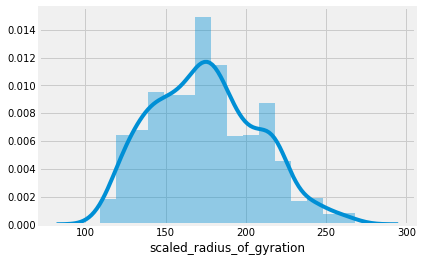

In [182]:
sns.distplot(df['scaled_radius_of_gyration'])
print('Skewness of scaled_radius_of_gyration attribute:{}'.format(skew(df['scaled_radius_of_gyration'])))

In [183]:
sns.distplot(df['scaled_radius_of_gyration.1'])
print('Skewness of scaled_radius_of_gyration.1 attribute:{}'.format(skew(df['scaled_radius_of_gyration.1'])))

Skewness of scaled_radius_of_gyration.1 attribute:nan


In [184]:
sns.distplot(df['skewness_about'])
print('Skewness of skewness_about attribute:{}'.format(skew(df['skewness_about'])))

Skewness of skewness_about attribute:nan


Skewness of skewness_about.1 attribute:nan


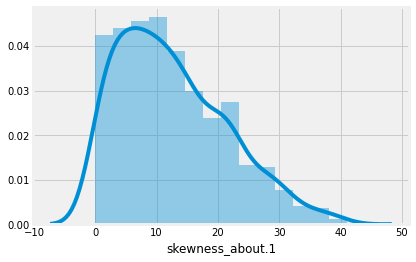

In [185]:
sns.distplot(df['skewness_about.1'])
print('Skewness of skewness_about.1 attribute:{}'.format(skew(df['skewness_about.1'])))

In [186]:
sns.distplot(df['skewness_about.2'])
print('Skewness of skewness_about.2 attribute:{}'.format(skew(df['skewness_about.2'])))

Skewness of skewness_about.2 attribute:nan


In [187]:
sns.distplot(df['hollows_ratio'])
print('Skewness of hollows_ratio attribute:{}'.format(skew(df['hollows_ratio'])))

Skewness of hollows_ratio attribute:-0.2259397681864609


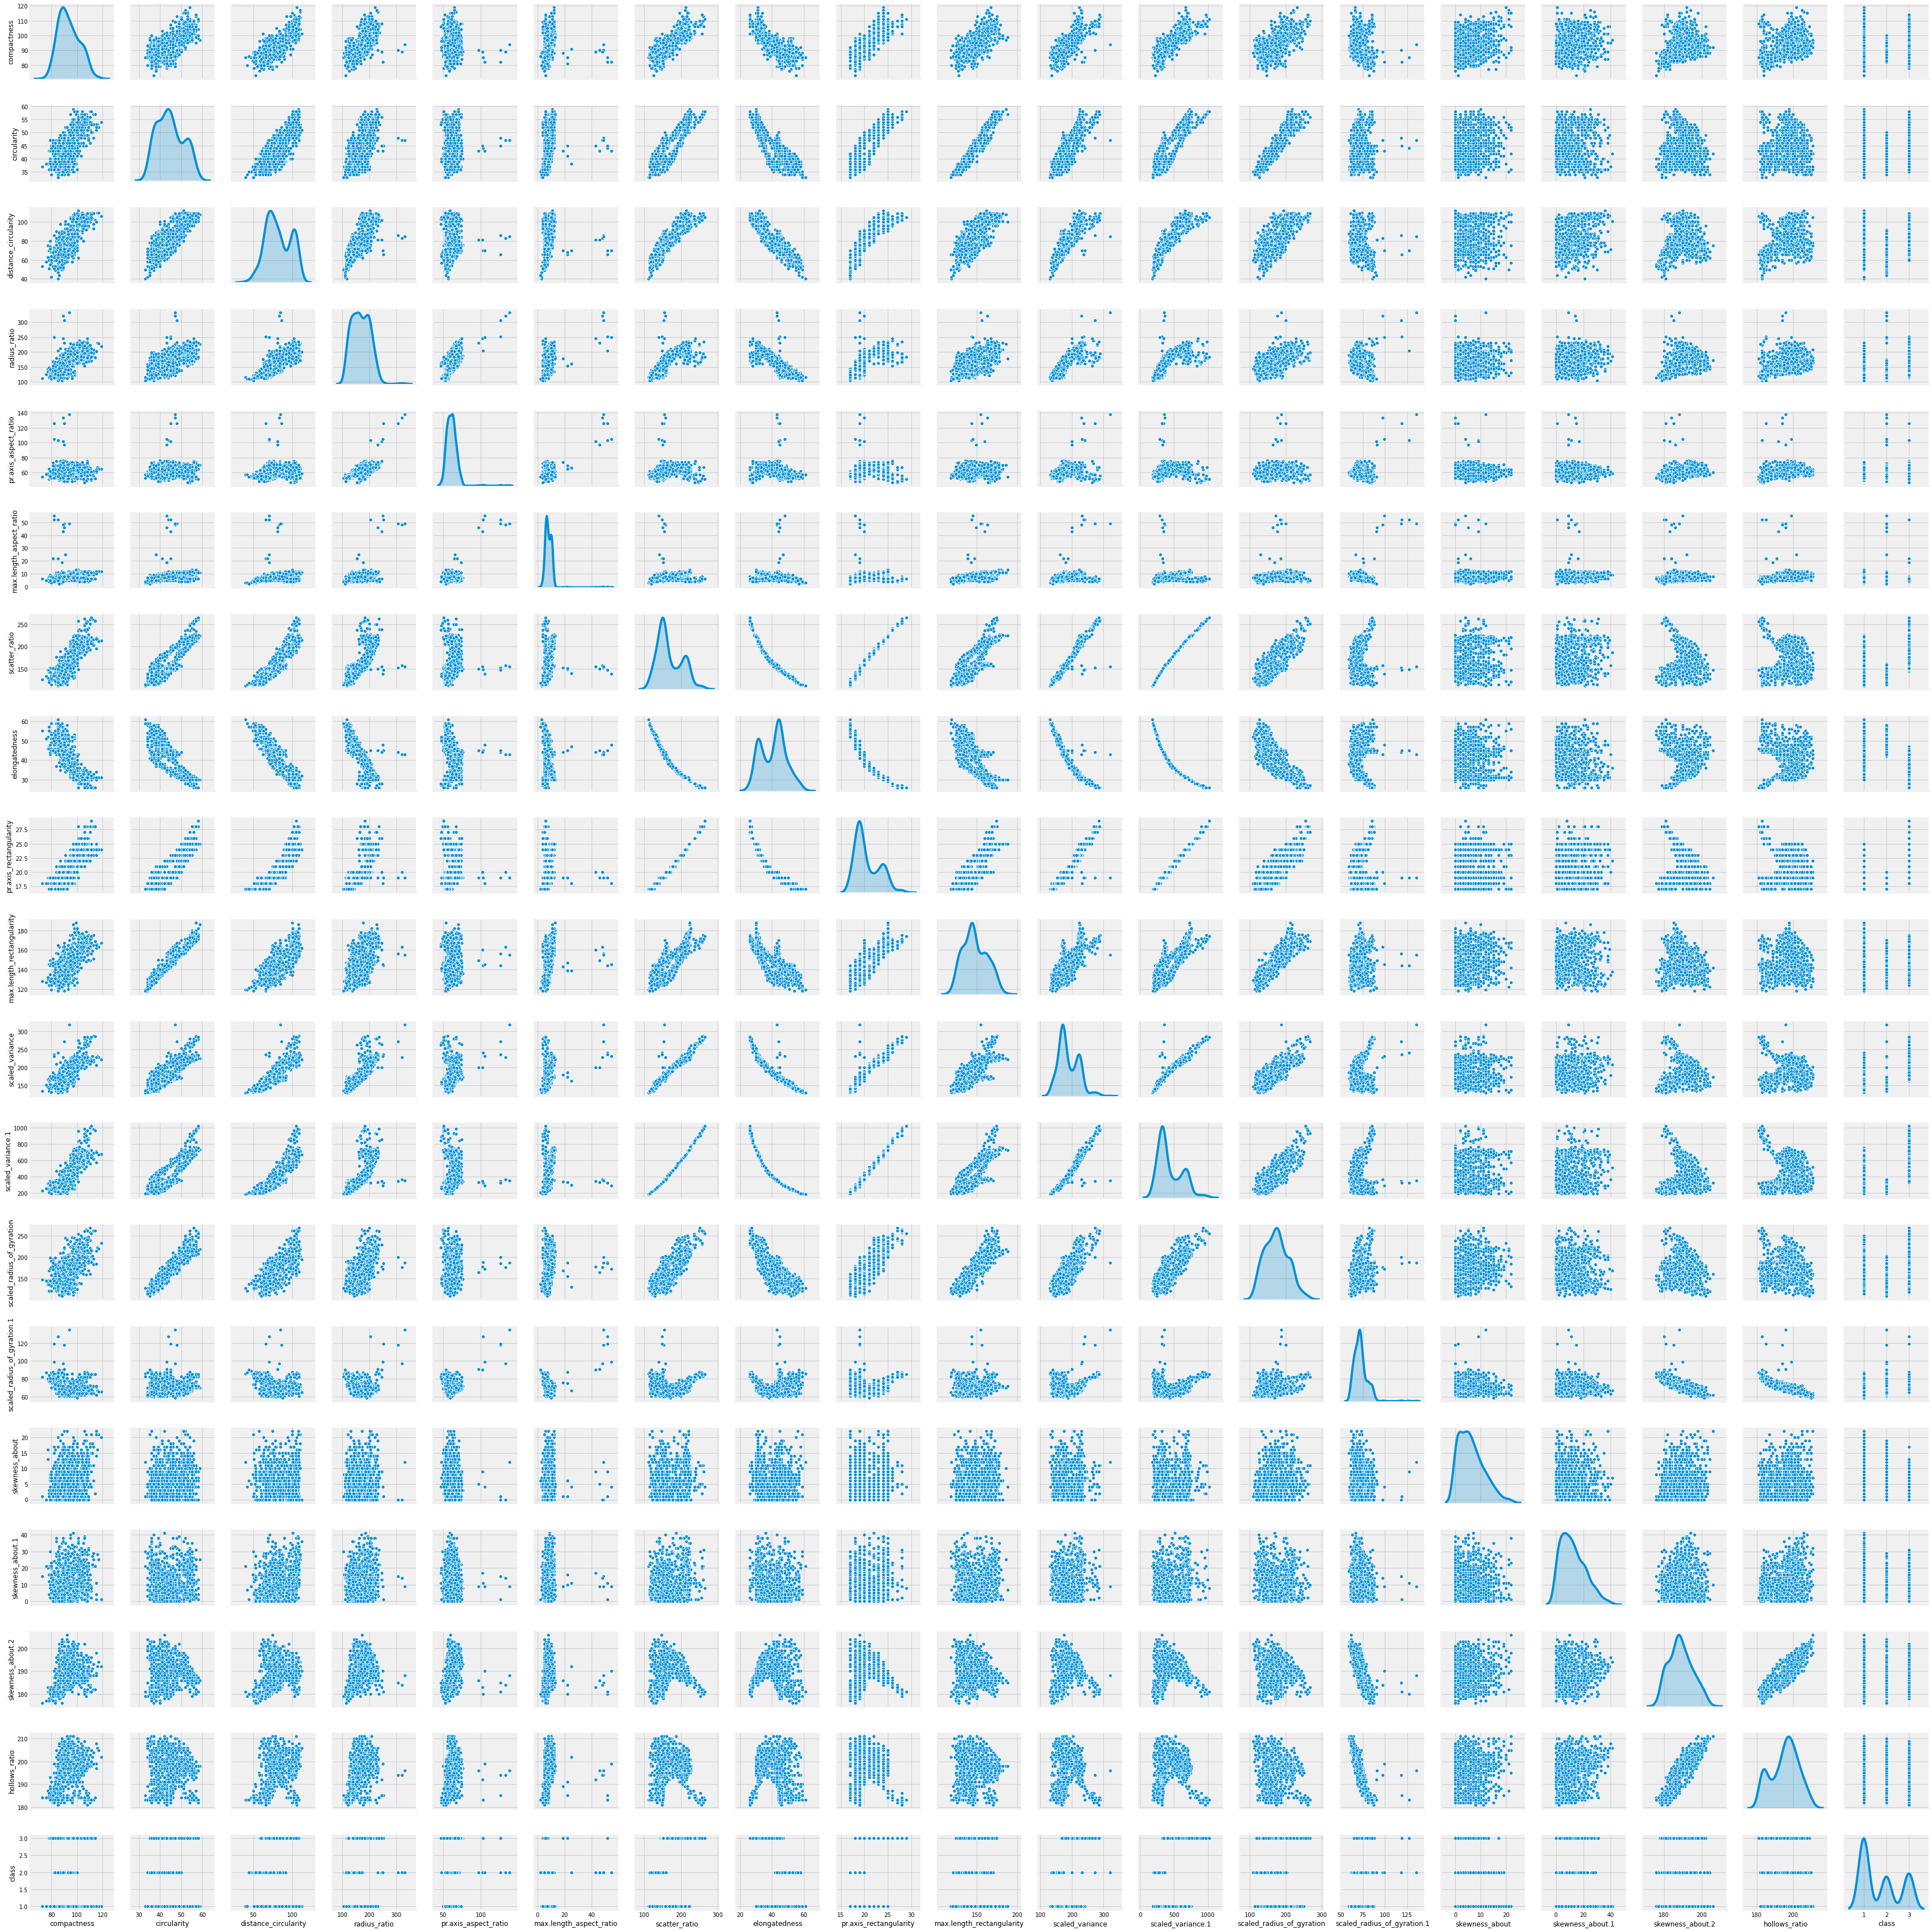

In [188]:
sns.pairplot(df,diag_kind='kde')

## Observations
1. We can observe a lot of attributes have some kind of correlation and hence are not independent.
2. We can expect that we can reduce the dimensions to almost a half or one third due to the high number of attributes which are dependent on one another or have some kind of correlation

## Imputing Missing Values

In [189]:
null_columns = df.columns[df.isnull().any()]; columns = list(df.columns)

print('Descriptive Stats before imputation for columns with missing values: \n', '--'*30)
display(df[null_columns].describe())

# Using SimpleImputer to fill missing values by median
impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
df = pd.DataFrame(impute.fit_transform(df), columns = columns)

print('Descriptive Stats after imputation: \n', '--'*30)
display(df[null_columns].describe())

del null_columns

Descriptive Stats before imputation for columns with missing values: 
 ------------------------------------------------------------


circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
count   841.000000            842.000000    840.000000            844.000000   
mean     44.828775             82.110451    168.888095             61.678910   
std       6.152172             15.778292     33.520198              7.891463   
min      33.000000             40.000000    104.000000             47.000000   
25%      40.000000             70.000000    141.000000             57.000000   
50%      44.000000             80.000000    167.000000             61.000000   
75%      49.000000             98.000000    195.000000             65.000000   
max      59.000000            112.000000    333.000000            138.000000   

       scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
count     845.000000     845.000000              843.000000       843.000000   
mean      168.901775      40.933728               20.582444       188.631079   
std        33.214848       7.816186                2.592933        31.411004   
min       112.000000      26.000000               17.000000       130.000000   
25%       147.000000      33.000000               19.000000       167.000000   
50%       157.000000      43.000000               20.000000       179.000000   
75%       198.000000      46.000000               23.000000       217.000000   
max       265.000000      61.000000               29.000000       320.000000   

       scaled_variance.1  scaled_radius_of_gyration  \
count         844.000000                 844.000000   
mean          439.494076                 174.709716   
std           176.666903                  32.584808   
min           184.000000                 109.000000   
25%           318.000000                 149.000000   
50%           363.500000                 173.500000   
75%           587.000000                 198.000000   
max          1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  
count        845.000000  
mean         188.919527  
std            6.155809  
min          176.000000  
25%          184.000000  
50%          188.000000  
75%          193.000000  
max          206.000000

Descriptive Stats after imputation: 
 ------------------------------------------------------------


circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
count   846.000000            846.000000    846.000000            846.000000   
mean     44.823877             82.100473    168.874704             61.677305   
std       6.134272             15.741569     33.401356              7.882188   
min      33.000000             40.000000    104.000000             47.000000   
25%      40.000000             70.000000    141.000000             57.000000   
50%      44.000000             80.000000    167.000000             61.000000   
75%      49.000000             98.000000    195.000000             65.000000   
max      59.000000            112.000000    333.000000            138.000000   

       scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
count     846.000000     846.000000              846.000000       846.000000   
mean      168.887707      40.936170               20.580378       188.596927   
std        33.197710       7.811882                2.588558        31.360427   
min       112.000000      26.000000               17.000000       130.000000   
25%       147.000000      33.000000               19.000000       167.000000   
50%       157.000000      43.000000               20.000000       179.000000   
75%       198.000000      46.000000               23.000000       217.000000   
max       265.000000      61.000000               29.000000       320.000000   

       scaled_variance.1  scaled_radius_of_gyration  \
count         846.000000                 846.000000   
mean          439.314421                 174.706856   
std           176.496341                  32.546277   
min           184.000000                 109.000000   
25%           318.250000                 149.000000   
50%           363.500000                 173.500000   
75%           586.750000                 198.000000   
max          1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  
count        846.000000  
mean         188.918440  
std            6.152247  
min          176.000000  
25%          184.000000  
50%          188.000000  
75%          193.000000  
max          206.000000

In [190]:
X=df.drop(['class'],axis=1)
y=df['class']

In [191]:
X=X.apply(zscore)

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
350     0.403605     0.191843              1.201323      1.231975   
40      0.160580     0.518073              1.392014      1.351801   
89     -1.662107    -1.276191             -1.595478     -1.583947   
427    -0.933032    -1.113076              0.438559      0.213450   
353    -1.540595     0.354958             -0.832714     -0.685249   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350              0.548738                -0.123383       0.696613   
40               0.675681                 0.094079       1.088438   
89              -0.847640                -0.558308      -1.322792   
427             -0.339866                 0.094079       0.003385   
353              0.294851                -0.558308      -0.539142   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350      -0.760339                0.548746                   0.206877   
40       -1.144597                0.935290                   0.206877   
89        1.673292               -0.997430                  -1.585352   
427      -0.247996               -0.224342                  -1.102829   
353       0.392433               -0.610886                  -0.068850   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
350         0.619078           0.604821                  -0.175450   
40          1.225295           1.069695                   0.839091   
89         -1.486730          -1.192313                  -1.312965   
427         0.044767          -0.064144                  -0.821066   
353        -0.561451          -0.563032                   0.623885   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                    -0.863208       -1.094148          2.173450   
40                      0.208557       -0.277879         -0.403383   
89                      1.146352        0.334323         -0.851529   
427                    -0.729238        0.130256          2.285487   
353                     0.342528       -0.277879         -1.411710   

     skewness_about.2  hollows_ratio  
350          0.338542       0.587487  
40          -0.474650      -0.354082  
89          -1.775757      -1.564671  
427          0.663818       0.856507  
353         -0.962565      -1.026631

In [193]:
from sklearn import svm
model1=svm.SVC(gamma=0.001,C=1000)
model1.fit(x_train,y_train)
predict1=model1.predict(x_test)
model1_score=model1.score(x_test,y_test)
print(model1_score)

0.968503937007874


In [194]:
from sklearn import metrics
print(metrics.classification_report(y_test,predict1))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       133
         2.0       0.97      0.94      0.95        62
         3.0       0.97      0.97      0.97        59

    accuracy                           0.97       254
   macro avg       0.97      0.96      0.96       254
weighted avg       0.97      0.97      0.97       254



#### We can observe that our model performed incredibly well. The precision, recall and accuracy are extremely good.

# Now, we will build a model after dimensionality reduction through PCA

In [195]:
cov_matrix = np.cov(X,rowvar=False)
print(cov_matrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [196]:
# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [197]:
# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


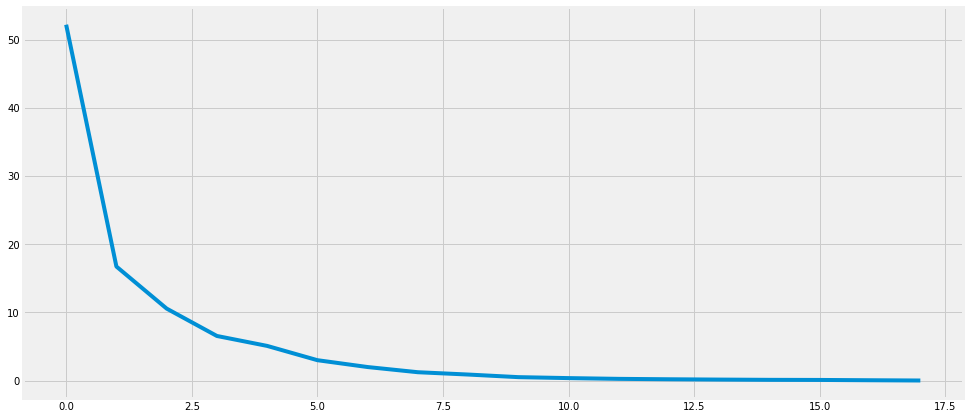

In [198]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)

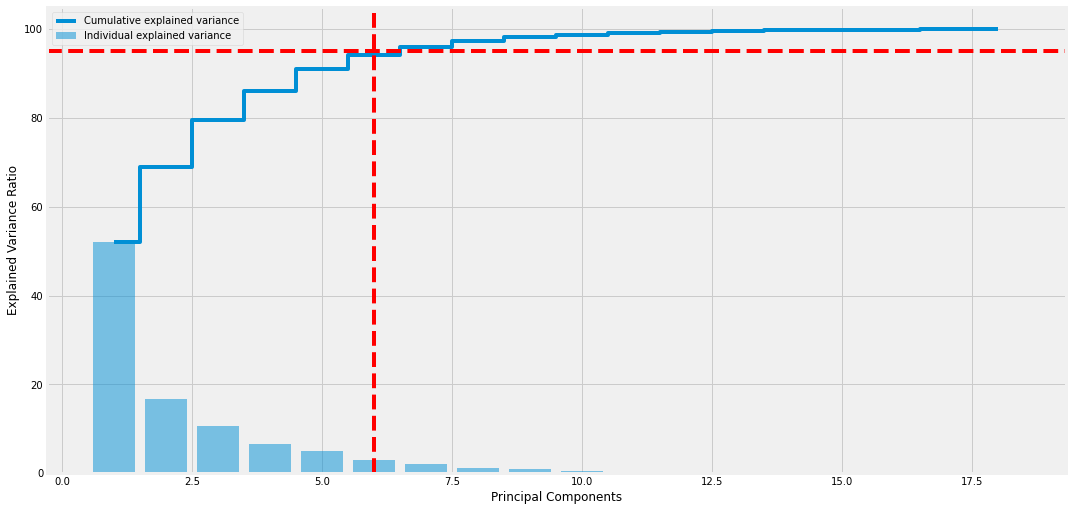

In [199]:

# Ploting 
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 6, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### We can observe that there is a steep drop in variance explained as the number of principal components increase
#### More than 95% of variance is explained by 6 components, so we will proceed with 6 components.

In [200]:
pca = PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [201]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263]


In [202]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074210e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [203]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413]


In [204]:
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)

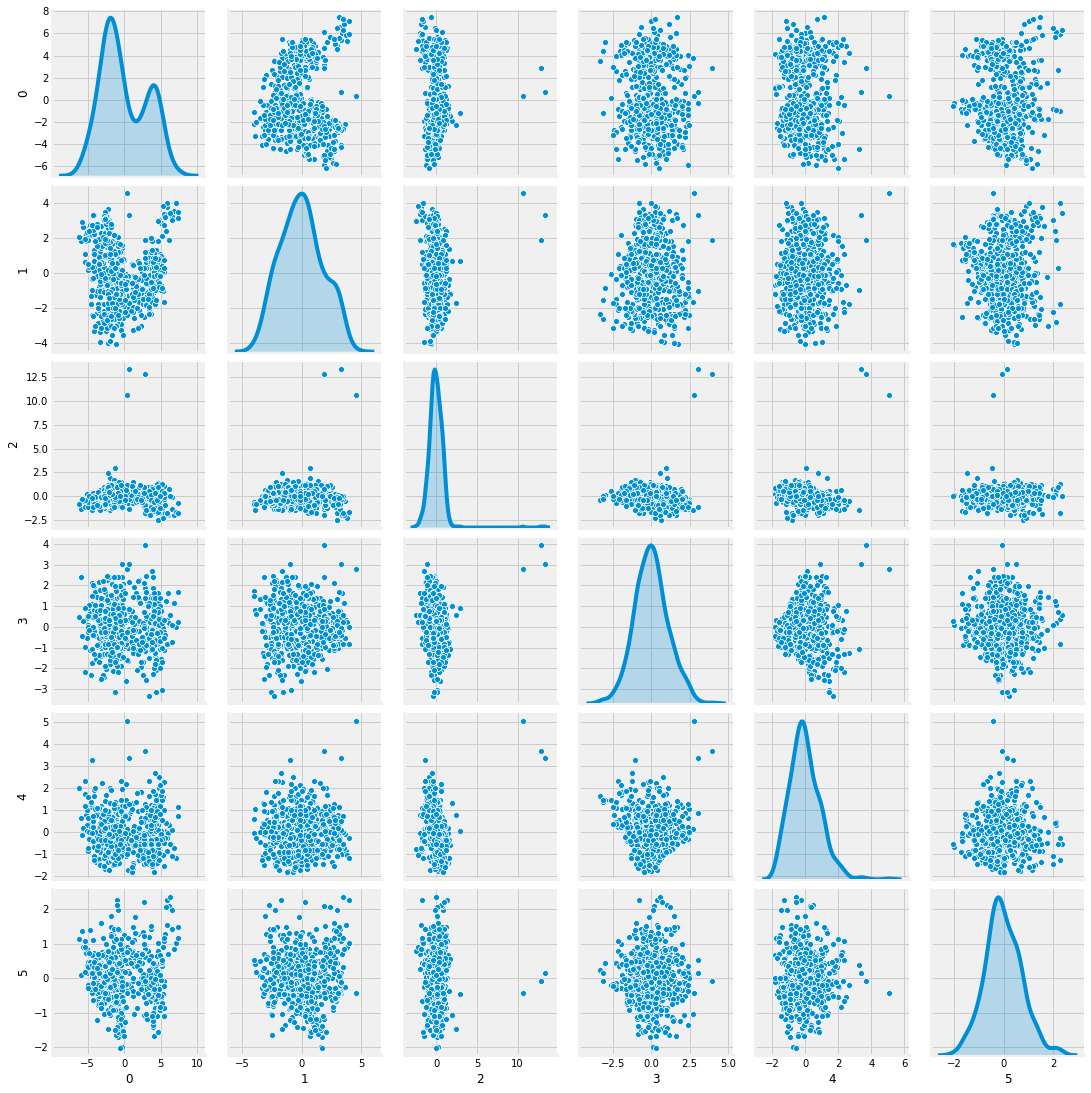

In [205]:
# Pairplot after dimension reduction
sns.pairplot(pd.DataFrame(x_train_reduced), diag_kind = 'kde')

#### We can observe that not only have we reduced the number of dimensions, but the dimensions that we have now are completely independent with respect to each other

In [206]:
model2=svm.SVC(gamma=0.001,C=1000)
model2.fit(x_train_reduced,y_train)
predict2=model2.predict(x_test_reduced)
model2_score=model2.score(x_test_reduced,y_test)
print(model2_score)

0.6141732283464567


In [207]:
from sklearn import metrics
print('Classification Report for the classifier after PCA:')
print(metrics.classification_report(y_test,predict2))

Classification Report for the classifier after PCA:
              precision    recall  f1-score   support

         1.0       0.68      0.80      0.73       133
         2.0       0.53      0.47      0.50        62
         3.0       0.49      0.36      0.41        59

    accuracy                           0.61       254
   macro avg       0.57      0.54      0.55       254
weighted avg       0.60      0.61      0.60       254



In [208]:
from sklearn import metrics
print('Classification Report for the classifier before PCA:')
print(metrics.classification_report(y_test,predict1))

Classification Report for the classifier before PCA:
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       133
         2.0       0.97      0.94      0.95        62
         3.0       0.97      0.97      0.97        59

    accuracy                           0.97       254
   macro avg       0.97      0.96      0.96       254
weighted avg       0.97      0.97      0.97       254



We can observe that the precision,accuracy and recall, all three have significantly reduced after PCA.
Hence we conclude that although PCA and dimensionality reduction would help develop better models where the number of dimensions are huge. Since the raw dataset contains less attributes than any industrial problem would do, PCA does not perform as good as it was expected. Though it still has an accuracy of 61% after reducing the number of attributes from 18 to 6, the accuracy is pretty low.